In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv(r'./economic_index.csv')
data.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2016,10,1.75,5.8,943
1,2016,9,1.75,6.1,958
2,2016,8,1.75,6.2,971
3,2016,7,1.75,6.1,949
4,2016,6,1.75,6.1,884


In [18]:
# check for empty value
data.isnull().sum()

year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [19]:
print(data.columns)
data.head()

Index(['year', 'month', 'interest_rate', 'unemployment_rate', 'index_price'], dtype='object')


,year,month,interest_rate,unemployment_rate,index_price
0,2016,10,1.75,5.8,943
1,2016,9,1.75,6.1,958
2,2016,8,1.75,6.2,971
3,2016,7,1.75,6.1,949
4,2016,6,1.75,6.1,884


In [20]:
data.drop(["year", "month"], axis=1, inplace=True)
data.head()

,interest_rate,unemployment_rate,index_price
0,1.75,5.8,943
1,1.75,6.1,958
2,1.75,6.2,971
3,1.75,6.1,949
4,1.75,6.1,884


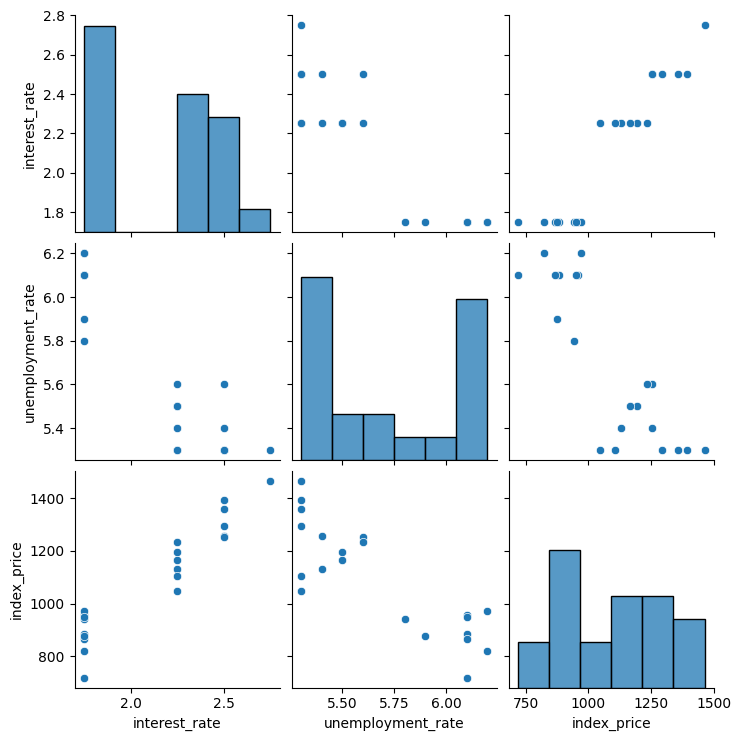

In [21]:
sns.pairplot(data)

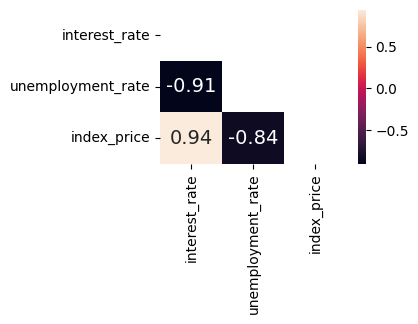

In [22]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True # true 1 fasle 0
# visulaise the correlation
plt.figure(figsize=(3,2))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size' : 14})
plt.show()

In [23]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [24]:
y.head()

0    943
1    958
2    971
3    949
4    884
Name: index_price, dtype: int64

In [25]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

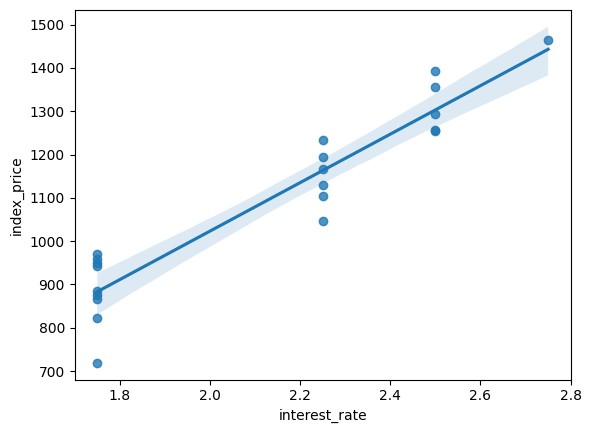

In [26]:
sns.regplot(x=data["interest_rate"], y=data["index_price"], data=data)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

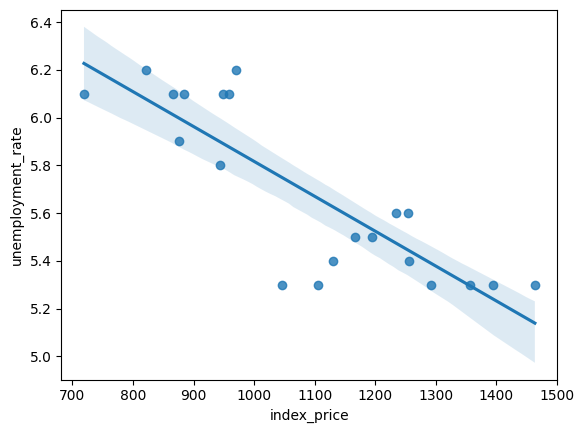

In [27]:
sns.regplot(y=data["unemployment_rate"], x=data["index_price"], data=data)

When you use StandardScaler(), it learns two things from your training data (X_train):

The mean (average) of each feature in X_train.
The standard deviation (spread of values) of each feature in X_train.
Once it learns these values, it uses them to transform both X_train and X_test.

What Happens If You Don't Do This Correctly?
If you use fit_transform() on both X_train and X_test separately, you will get different mean and standard deviation values for each dataset, which will cause your model to behave inconsistently.

✔ fit_transform(X_train) → Learns mean & std, then scales X_train.
✔ transform(X_test) → Uses X_train's mean & std to scale X_test.
❌ Never use fit_transform(X_test) separately, as it will learn different mean & std.

In [29]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)


In [30]:
X_train_scaled

array([[ 0.87210285, -0.87186662],
       [-1.30815427,  1.35417582],
       [ 0.14535047, -0.59361132],
       [ 0.14535047, -0.31535601],
       [ 0.87210285, -0.59361132],
       [-1.30815427,  1.63243113],
       [ 1.59885522, -0.87186662],
       [ 0.14535047, -0.87186662],
       [-1.30815427,  1.35417582],
       [ 0.87210285, -0.87186662],
       [-1.30815427,  1.63243113],
       [ 0.87210285, -0.87186662],
       [ 0.87210285, -0.03710071],
       [ 0.14535047, -0.87186662],
       [-1.30815427,  0.79766521]])

In [31]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train_scaled, y_train)

LinearRegression()

cross_val_score is a function in scikit-learn that performs cross-validation to evaluate the performance of a model by splitting the data into multiple train-test sets. This helps in getting a more reliable estimate of model performance.

Why Use cross_val_score?
Prevents Overfitting – Instead of relying on a single train-test split, it evaluates the model on multiple subsets of the data.
More Reliable Performance Estimation – Reduces bias caused by selecting a specific train-test split.
Works with Different Scoring Metrics – Allows you to choose accuracy, R², MSE, etc.


In [38]:
from sklearn.model_selection import cross_val_score
validataion_scores = cross_val_score(regr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

In [39]:
np.mean(validataion_scores)

np.float64(-5040.159557487276)

In [40]:
# prediction
y_pred = regr.predict(X_test_scaled)

In [41]:
y_pred

array([ 860.39001063, 1152.82290429, 1164.28736638,  894.78339689,
        894.78339689,  894.78339689])

In [45]:
# performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r_squared = r2_score(y_test, y_pred)
print('mean_squared_error(mse) : ', mse)
print('mean_absolute_error(mae) : ', mae)
print('root_mean_squared_error(rmse) : ', rmse)
print('R2  : ', r_squared)

# adjusted R2
n = len(y_test)
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print('Adjuested R2  : ',adjusted_r_squared)


mean_squared_error(mse) :  7934.979523254874
mean_absolute_error(mae) :  72.38051926402858
root_mean_squared_error(rmse) :  89.07850202632997
R2  :  0.739047939228711
Adjuested R2  :  0.5650798987145185


In [46]:
residuals = y_test - y_pred
print(residuals)

0      82.609989
17     14.177096
15     69.712634
1      63.216603
8    -175.783397
5     -28.783397
Name: index_price, dtype: float64


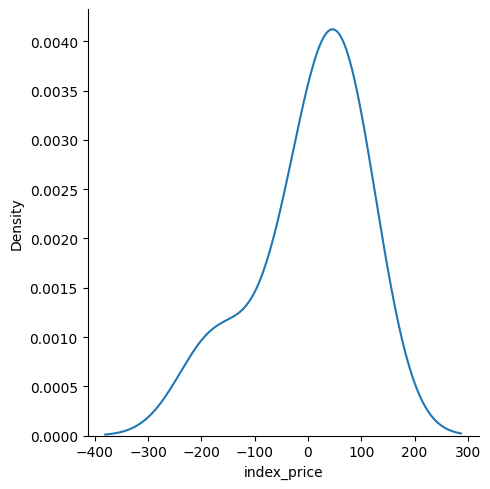

In [47]:
sns.displot(residuals, kind='kde')

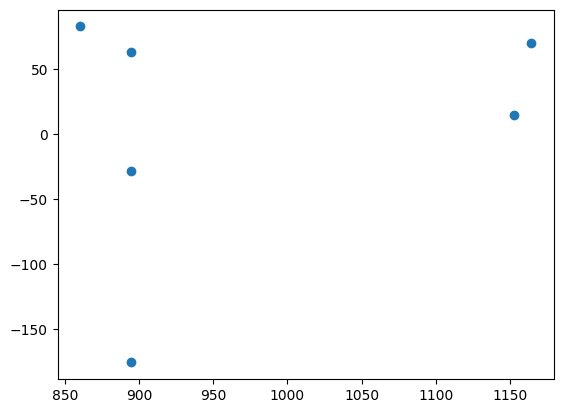

In [48]:
# scatter plot pred vs residuals
plt.scatter(y_pred, residuals)

In [52]:
# OLS
import statsmodels.api as sm
model  = sm.OLS(y_train, X_train_scaled).fit()
prediction = model.predict(X_test_scaled)
print(prediction)
model.summary()

[-272.74332271   19.68957096   31.15403305 -238.34993645 -238.34993645
 -238.34993645]


d:\Work_Directory\Machie Learning\.mlvenv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.027
Model:                            OLS   Adj. R-squared (uncentered):             -0.123
Method:                 Least Squares   F-statistic:                             0.1799
Date:                Mon, 03 Feb 2025   Prob (F-statistic):                       0.837
Time:                        21:36:23   Log-Likelihood:                         -126.79
No. Observations:                  15   AIC:                                      257.6
Df Residuals:                      13   BIC:                                      259.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           224.8539    714.682      0.315      0.758   -1319.123    1768.831
x2            41.2012    714.682      0.058      0.955   -1502.776    1585.179
==============================================================================
Omnibus:                        0.691   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.611
Skew:                           0.033   Prob(JB):                        0.737
Kurtosis:                       2.013   Cond. No.                         4.31
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
print('Coeff or slope: ', regr.coef_[0])
print('intercept : ', regr.intercept_)

Coeff or slope:  224.85394703878373
intercept :  1133.1333333333337
